In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import random
import matplotlib.pyplot as plt
import matplotlib
import tensorflow as tf
 
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
 
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter)
 

In [2]:
data = pd.read_csv("emails.csv")

Check whether there is any missing value

In [48]:
column_with_na=list()

for i in range(data.shape[1]):
    if sum(data.iloc[:,i].isna()) >0:
       column_with_na.append(i)
    
print(len(column_with_na))

0


Check whether there is column with all zero entry

In [37]:
raised=0

for i in range(data.shape[1]):
    if isinstance(data.iloc[1,i],(int,np.integer))== True:
        if sum(data.iloc[:,i])==0:
            print(i)
            raised=1
            
if raised==0:
    print("no case raised")

no case raised


Build the spam email detection system using one deep learning method and one machine learning method and do the comparison and draw conclusion.

MLP vs Decision Tree

Multi Layer Perceptron

In [94]:
X=data.iloc[:,1:(data.shape[1]-1)]
y=data.loc[:,"Prediction"]
#data_ts=tf.convert_to_tensor(data)
X_second, X_test, y_second, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)


X_train, X_valid, y_train, y_valid = train_test_split(
     X_second, y_second, test_size=0.3, random_state=0)



In [95]:
X_train=X_train.to_numpy()
y_train=y_train.to_numpy()
X_valid=X_valid.to_numpy()
y_valid=y_valid.to_numpy()
X_test=X_test.to_numpy()
y_test=y_test.to_numpy()


In [125]:
model = tf.keras.Sequential()
 
#Define the model.
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(Dense(1,  activation="sigmoid"))



In [126]:
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])


The structure of this MLP model is shown below:

The input layer (3000 node)

1st hidden layer (128 neutrons) 

2nd hidden layer (128 neutrons) 

output layer (1 node) 

In [127]:
training_results = model.fit(X_train, 
                             y_train, 
                             epochs=20, 
                             batch_size=64, 
                             validation_data=(X_valid, y_valid))


Epoch 1/20
46/46 [==============================] - 1s 8ms/step - loss: 0.0000e+00 - accuracy: 0.6950 - val_loss: 0.0000e+00 - val_accuracy: 0.7126
Epoch 2/20
46/46 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 0.7036 - val_loss: 0.0000e+00 - val_accuracy: 0.7126
Epoch 3/20
46/46 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 0.7036 - val_loss: 0.0000e+00 - val_accuracy: 0.7126
Epoch 4/20
46/46 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 0.7036 - val_loss: 0.0000e+00 - val_accuracy: 0.7126
Epoch 5/20
46/46 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.7036 - val_loss: 0.0000e+00 - val_accuracy: 0.7126
Epoch 6/20
46/46 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 0.7036 - val_loss: 0.0000e+00 - val_accuracy: 0.7126
Epoch 7/20
46/46 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 0.7036 - val_loss

In [128]:
ts_pred=model.predict(X_test)
accuracy_score(y_test, ts_pred)

#the accuracy is about 72.5%

0.7246376811594203

Decision Tree

In [ ]:
X=data.iloc[:,1:(data.shape[1]-1)]
y=data.loc[:,"Prediction"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

#Data splitting

In [10]:
clf = tree.DecisionTreeClassifier(max_depth=1)
clf = clf.fit(X_train, y_train)

In [11]:
y_pred=clf.predict(X_test)
accuracy_score(y_test, y_pred)

#the accuracy is about 72.5%

0.7246376811594203

[Text(0.5, 0.75, 'X[13] <= 0.5\ngini = 0.415\nsamples = 4137\nvalue = [2922, 1215]'),
 Text(0.25, 0.25, 'gini = 0.484\nsamples = 2954\nvalue = [1739, 1215]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 1183\nvalue = [1183, 0]')]

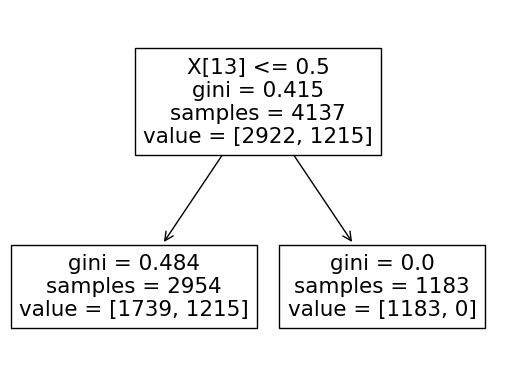

In [12]:
tree.plot_tree(clf)

#plot the tree diagram

Conclusion drawn

In [13]:
print("the Column name of 13 th column is %s"%(X_train.iloc[:,13].name))


the Column name of 13 th column is enron


if the email does contain "enron", then this is a span email.

One of the conclusion drawn is that a company named enron may be used to do the spam 
attack.


In conclusion, the decision tree model with depth 1 performs similar to the MLP model
in terms of accuracy.
